In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Chi-square case study

In [50]:
#!wget --no-check-certificate https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f -O aerofit.csv

In [51]:
df_aerofit = pd.read_csv('aerofit.csv')

df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**What should be the null and alternate hypothesis?**

𝐻0 : Gender does not impact the buying of product

𝐻1 : Gender impacts the buying of product

In [52]:
gender_product = pd.crosstab(index=df_aerofit['Gender'],columns=df_aerofit['Product'])
gender_product # This will give the count of each gender for each product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [53]:
from scipy.stats import chi2_contingency

In [54]:
chi_stat, p_value, df, exp_freq = chi2_contingency(gender_product) # chi_stat, p_value, df, expected value
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 12.923836032388664
p_value: 0.0015617972833158714
df: 2
exp_freq: [[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]


In [55]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Gender impacts product")
else:
    print("Fail to reject H0")
    print("Gender does not impact product")

Reject H0
Gender impacts product


## ANOVA

In [56]:
df_aerofit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<AxesSubplot: xlabel='Product', ylabel='Income'>

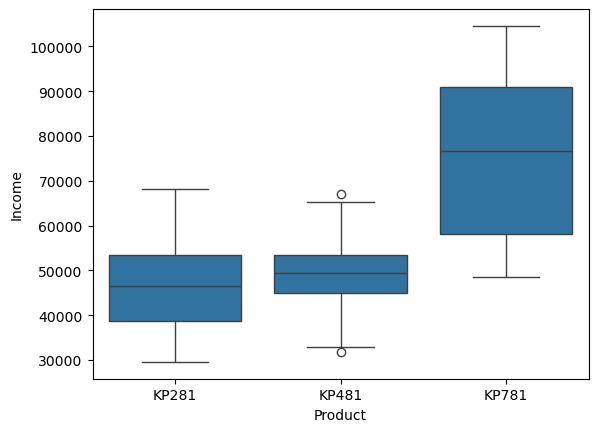

In [57]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [58]:
df_aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [59]:
np.random.seed(42)
df_aerofit['random_group'] = np.random.choice(['g1', 'g2', 'g3'], size=len(df_aerofit))
df_aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g3
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,g1
176,KP781,42,Male,18,Single,5,4,89641,200,g3
177,KP781,45,Male,16,Single,5,5,90886,160,g2
178,KP781,47,Male,18,Partnered,4,5,104581,120,g1


<AxesSubplot: xlabel='random_group', ylabel='Income'>

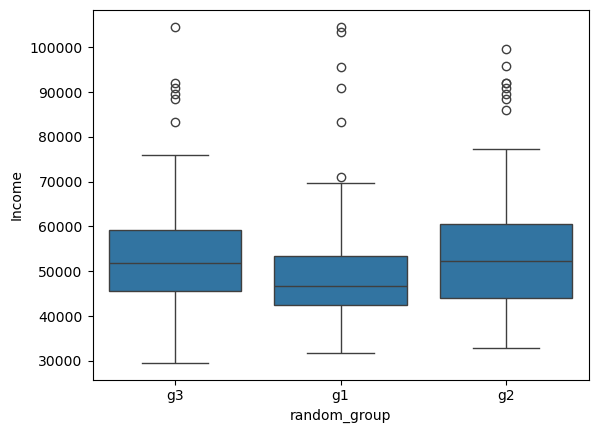

In [60]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

<AxesSubplot: xlabel='Product', ylabel='Income'>

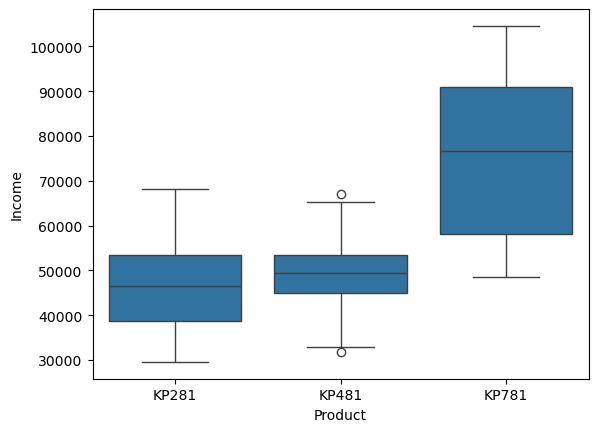

In [61]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [62]:
from scipy.stats import f_oneway

In [63]:
income_g1 = df_aerofit[df_aerofit['random_group'] == 'g1']['Income']
income_g2 = df_aerofit[df_aerofit['random_group'] == 'g2']['Income']
income_g3 = df_aerofit[df_aerofit['random_group'] == 'g3']['Income']

f_stats, p_val = f_oneway(income_g1, income_g2, income_g3)

print(f_stats, p_val)

0.8263259710788367 0.43933541801191467


In [64]:
income_kp281 = df_aerofit[df_aerofit['Product']=='KP281']['Income']
income_kp481 = df_aerofit[df_aerofit['Product']=='KP481']['Income']
income_kp781 = df_aerofit[df_aerofit['Product']=='KP781']['Income']

f_stats, p_val = f_oneway(income_kp281, income_kp481, income_kp781)

print(f_stats, p_val)

89.25903546601671 1.5644991316342494e-27


using t test on multiple product we can do the above test but this is not robust

In [65]:
from scipy.stats import ttest_ind

In [66]:
t_stat, p_val = ttest_ind(income_kp281, income_kp481)
p_val

0.09487529747264932

In [67]:
t_stat, p_val = ttest_ind(income_kp481, income_kp781)
p_val

7.770191623361236e-16

In [68]:
t_stat, p_val = ttest_ind(income_kp281, income_kp781)
p_val

4.116508528877672e-21

## Kruskal - wallis Test

In [69]:
from scipy.stats import kruskal

In [70]:
stat, p_val = kruskal(income_g1, income_g2, income_g3)
p_val

0.2565498979655774

In [71]:
stat, p_val = kruskal(income_kp281, income_kp481, income_kp781)
p_val

4.562357014275808e-14

## Normality Test

In [72]:
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv


--2024-09-30 23:06:17--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 2404:6800:4007:823::200e, 142.250.195.78
Connecting to drive.google.com (drive.google.com)|2404:6800:4007:823::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2024-09-30 23:06:18--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2404:6800:4007:815::2001, 142.250.182.65
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2404:6800:4007:815::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K   804KB/s    in 0.5s    

2024-09-30 23:06:2

In [73]:
df_hw = pd.read_csv('weight-height.csv')
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [74]:
height = df_hw['Height']
height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

<AxesSubplot: xlabel='Height', ylabel='Count'>

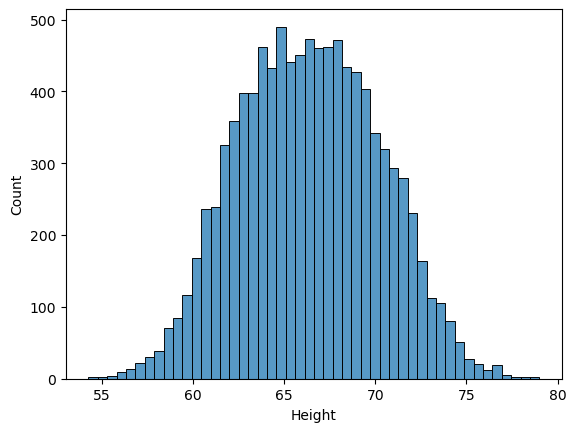

In [75]:
sns.histplot(height)

In [76]:
from statsmodels.api import qqplot

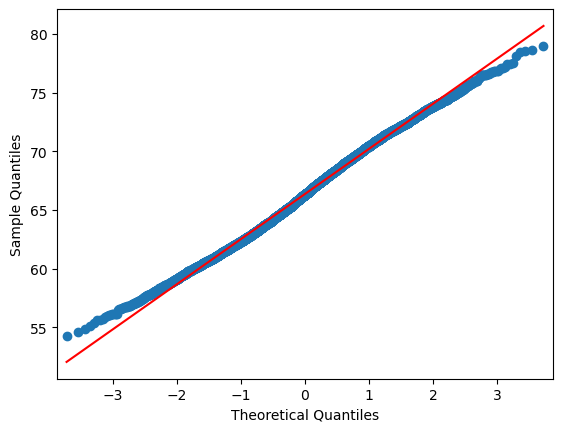

In [77]:
qqplot(height, line='s')
plt.show()

In [78]:
!wget --no-check-certificate https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI -O waiting_time.csv


--2024-09-30 23:06:21--  https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.google.com (drive.google.com)... 2404:6800:4007:823::200e, 142.250.195.78
Connecting to drive.google.com (drive.google.com)|2404:6800:4007:823::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI [following]
--2024-09-30 23:06:22--  https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2404:6800:4007:815::2001, 142.250.182.65
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2404:6800:4007:815::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1656272 (1.6M) [application/octet-stream]
Saving to: ‘waiting_time.csv’

waiting_time.csv    100%[===================>]   1.58M  2.24MB/s    in 0.7s    

2024-09-30 23:06:2

In [79]:
df_wt = pd.read_csv('waiting_time.csv')
df_wt

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439
...,...
90041,135.885984
90042,15.223970
90043,207.839528
90044,140.488418


<AxesSubplot: xlabel='time', ylabel='Count'>

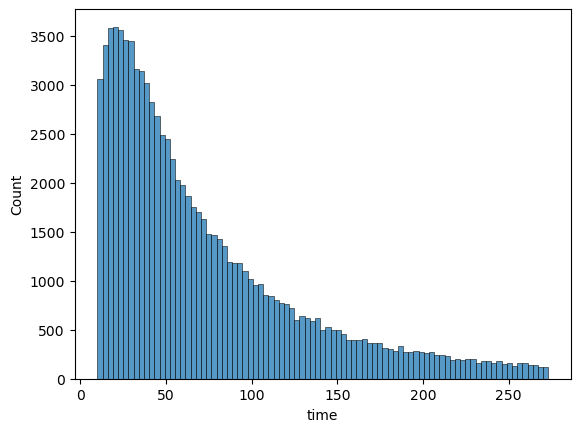

In [80]:
sns.histplot(df_wt['time'])

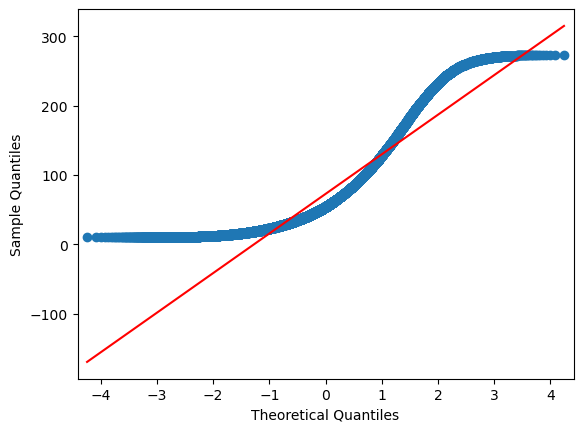

In [81]:
qqplot(df_wt['time'], line='s')
plt.show()

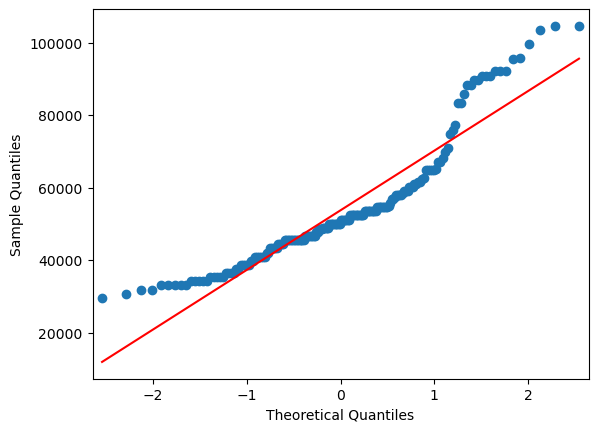

In [82]:
qqplot(df_aerofit['Income'], line='s')
plt.show()

In [83]:
from scipy.stats import shapiro

In [84]:
np.random.seed(42)
height_subset = df_hw['Height'].sample(3)


In [85]:
test_stat, p_val = shapiro(height_subset)
p_val

0.09949409568942214

In [86]:
np.random.seed(42)
df_wt_subset = df_wt.sample(100)['time']

In [87]:
test_stat, p_val = shapiro(df_wt_subset)
p_val

1.943695451700478e-06

In [88]:
Saurav = [300, 400, 300, 500, 50]
Naveen = [600, 300, 300, 400]
Radha = [700, 300, 400, 600, 500]

f_stat, p_val = f_oneway(Saurav, Naveen, Radha)
p_val

0.20659122081429684

## Assignment problems